Logistics Regression


```
# from sklearn.linear_model import LogisticRegression
```



---

SMOTE

---

RFE

```
# from sklearn.feature_selection import RFE
```



## Initialisation

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
file_path = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
df = pd.read_csv(file_path)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
non_numerical_columns = df.select_dtypes(exclude='number').columns.tolist()
non_numerical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [4]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

In [5]:
for i in non_numerical_columns :
  print(i)
  print(df[i].unique())

job
['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['Basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']
default
['unknown' 'no' 'yes']
housing
['yes' 'no' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['cellular' 'telephone']
month
['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
day_of_week
['thu' 'fri' 'tue' 'mon' 'wed']
poutcome
['nonexistent' 'success' 'failure']


In [6]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

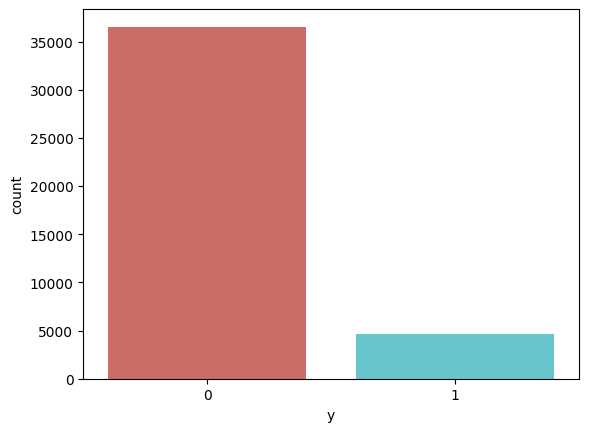

In [7]:
sns.countplot(x='y', data=df, hue='y', palette='hls', legend=False);

In [8]:
count_no_sub = len(df[df['y']==0])
count_sub = len(df[df['y']==1])

pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)

pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [9]:
df.groupby('y').mean(numeric_only='True')

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


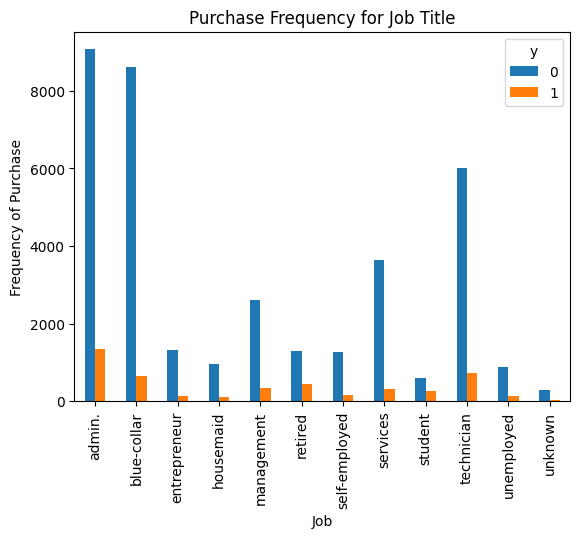

In [10]:
%matplotlib inline

pd.crosstab(df.job, df.y).plot(kind='bar');

plt.title('Purchase Frequency for Job Title');
plt.xlabel('Job');
plt.ylabel('Frequency of Purchase');

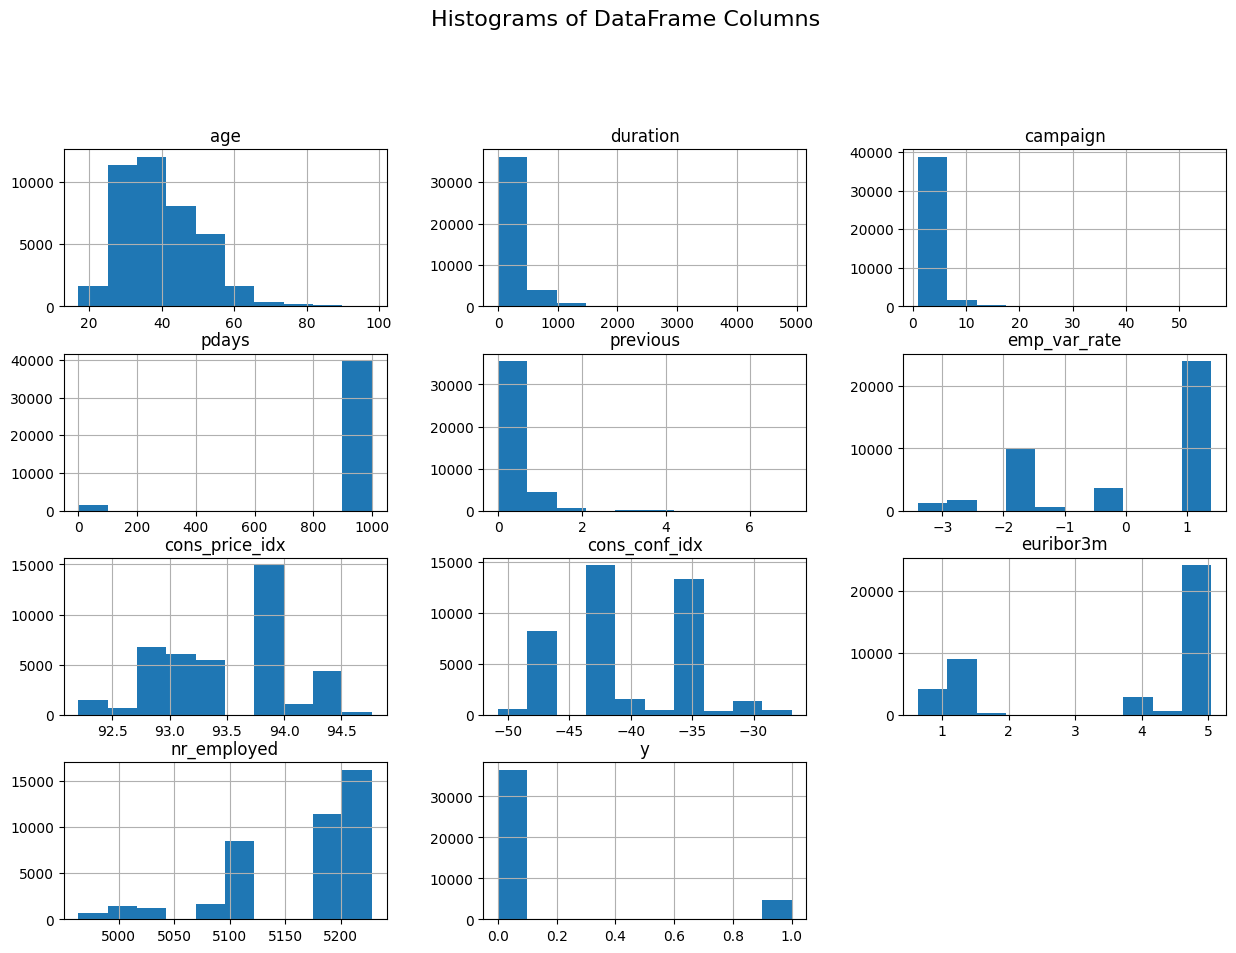

In [11]:
df.hist(figsize=(15, 10))
plt.suptitle('Histograms of DataFrame Columns', y=1.02, size=16);

## Dummy variables

In [15]:
# one-hot encoding all categorical variables
df = pd.get_dummies(df, columns=non_numerical_columns, prefix=non_numerical_columns)

# List of columns to keep (non-categorical variables)
to_keep = [col for col in df.columns if col not in non_numerical_columns]
df = df[to_keep]
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [17]:
df.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

## SMOTE

In [20]:
X = df.loc[:, df.columns != 'y']
y = df.loc[:, df.columns == 'y']

In [22]:
os = SMOTE(random_state=2024)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


os_data_X,os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=X_train.columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5



## Recursive Feature Elimination - RFE

In [27]:
scaler = StandardScaler()
os_data_X_scaled = scaler.fit_transform(os_data_X)

logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=20, step=1)
rfe = rfe.fit(os_data_X_scaled, os_data_y.values.ravel())

In [28]:
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False  True  True
 False  True False  True  True  True  True  True  True False False False
 False False False False False False False  True  True  True  True  True
  True  True  True]
[44  1 40 14 42  1  8 39 30 38 19 15 21 22 20 24 16 17 25 18 23 26 11  9
 10 37  5  6  1  2 41  4  3  7  1  1 43  1 12  1  1  1  1  1  1 29 33 35
 31 28 36 13 27 32 34  1  1  1  1  1  1  1  1]


In [30]:
selected_columns = os_data_X.columns[rfe.support_].tolist()
selected_columns
# os_data_X.columns gives you a pandas Index object containing the column names of the original feature matrix.
# rfe.support_ is the boolean array indicating which features were selected by RFE.
# os_data_X.columns[rfe.support_] uses boolean indexing to select only the columns that correspond to True values in rfe.support_.
# .tolist() converts the resulting pandas Index object to a Python list.

['duration',
 'emp_var_rate',
 'education_basic.9y',
 'default_no',
 'default_unknown',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

## Implementing the model

In [31]:
X=os_data_X[selected_columns]
y=os_data_y['y']

In [32]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.197494
         Iterations 9
                           Results: Logit
Model:                Logit             Method:            MLE       
Dependent Variable:   y                 Pseudo R-squared:  0.715     
Date:                 2024-01-22 10:44  AIC:               20237.3016
No. Observations:     51134             BIC:               20414.1457
Df Model:             19                Log-Likelihood:    -10099.   
Df Residuals:         51114             LL-Null:           -35443.   
Converged:            1.0000            LLR p-value:       0.0000    
No. Iterations:       9.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
duration              0.0065   0.0001  80.2089 0.0000  0.0063  0.0066
emp_var_rate    

In [33]:
X = X.drop(['default_unknown'], axis=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.197497
         Iterations 8
                           Results: Logit
Model:                Logit             Method:            MLE       
Dependent Variable:   y                 Pseudo R-squared:  0.715     
Date:                 2024-01-22 10:54  AIC:               20235.6007
No. Observations:     51134             BIC:               20403.6026
Df Model:             18                Log-Likelihood:    -10099.   
Df Residuals:         51115             LL-Null:           -35443.   
Converged:            1.0000            LLR p-value:       0.0000    
No. Iterations:       8.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
duration              0.0065   0.0001  80.5667 0.0000  0.0063  0.0066
emp_var_rate    

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Logistic Regression Model Fitting
## New Section

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [38]:
y_pred = logreg.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_scaled, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


## Confusion Matrix

In [39]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7399  267]
 [ 714 6961]]


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7666
           1       0.96      0.91      0.93      7675

    accuracy                           0.94     15341
   macro avg       0.94      0.94      0.94     15341
weighted avg       0.94      0.94      0.94     15341

